In [1]:
pip install pillow

In [2]:
pip install numpy

In [3]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [9]:
def encrypt_image(image_path, key):
    image = Image.open(image_path)
    width, height = image.size

    pixels = list(image.getdata())
    pixels_array = np.array(pixels)

    encrypted_pixels_array = pixels_array.copy()
    for i in range(len(encrypted_pixels_array)):
        r, g, b = encrypted_pixels_array[i]
        encrypted_pixels_array[i] = (b, g, r)
        encrypted_pixels_array[i] = (r + key, g + key, b + key)

    encrypted_image = Image.new(image.mode, image.size)
    encrypted_image.putdata([tuple(pixel) for pixel in encrypted_pixels_array])

    return encrypted_image

def decrypt_image(encrypted_image, key):
    pixels = list(encrypted_image.getdata())
    pixels_array = np.array(pixels)

    decrypted_pixels_array = pixels_array.copy()
    for i in range(len(decrypted_pixels_array)):
        r, g, b = decrypted_pixels_array[i]
        decrypted_pixels_array[i] = (r - key, g - key, b - key)
        decrypted_pixels_array[i] = (b, g, r)

    decrypted_image = Image.new(encrypted_image.mode, encrypted_image.size)
    decrypted_image.putdata([tuple(pixel) for pixel in decrypted_pixels_array])

    return decrypted_image

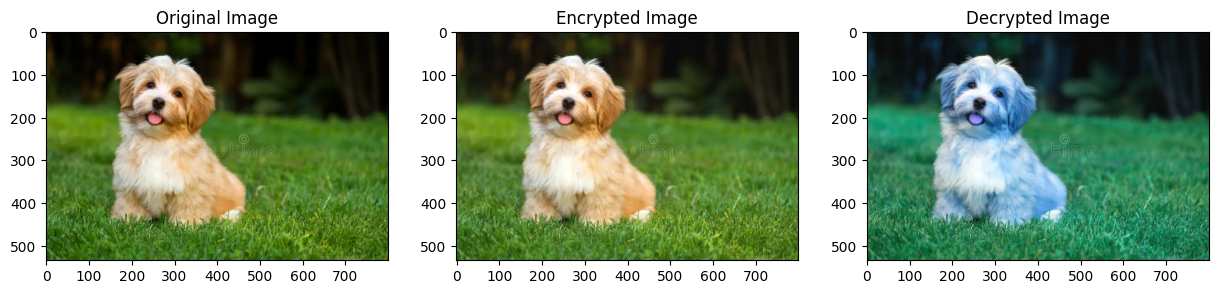

In [10]:
def main():
    image_path = '/content/sample_data/puppy.webp'
    key = 10

    original_image = Image.open(image_path)

    encrypted_image = encrypt_image(image_path, key)
    decrypted_image = decrypt_image(encrypted_image, key)

    fig, axs = plt.subplots(1, 3, figsize=(15, 5))
    axs[0].imshow(original_image)
    axs[0].set_title("Original Image")
    axs[1].imshow(encrypted_image)
    axs[1].set_title("Encrypted Image")
    axs[2].imshow(decrypted_image)
    axs[2].set_title("Decrypted Image")
    plt.show()

if __name__ == "__main__":
    main()